In [1]:
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib
%matplotlib notebook
%matplotlib inline
matplotlib.rcParams.update({'font.size': 11, 'figure.figsize' : (40., 7.)})

import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'serif', 'text.usetex': True, 'pgf.rcfonts': False, "pgf.texsystem": "pdflatex"})

%load_ext autoreload
%autoreload 2

from Database import *
from Densities import *
from MultiIndex import *
from Surrogates import *
from Transport import *

import plotutil, randutil

# Multimodal Rosenbrock test density

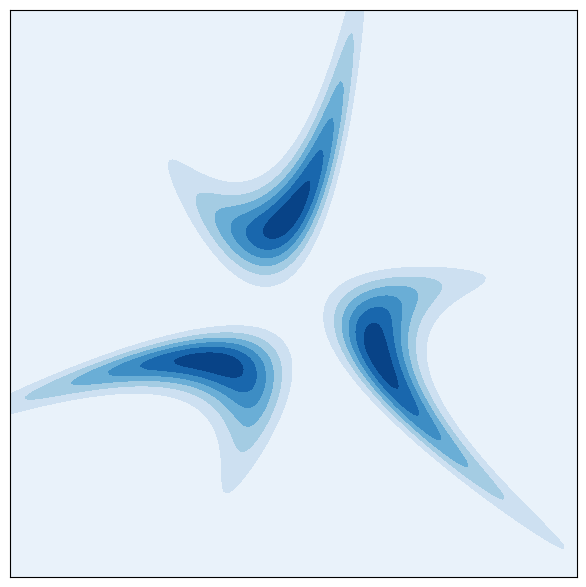

In [2]:
delta = 10*np.pi/72
thetas = [2*np.pi+.3-i*2/3*np.pi-delta for i in range(3)]
cs = [.3*np.array([np.cos(th), np.sin(th)-.2]) for th in [(6 + i*8)/12*np.pi+delta for i in range(3)]]
t_m = MultimodalDensity(densities=[Rosenbrock(a=.4, b=4, theta=t, centr=c, scale=3.5) for c, t in zip(cs,thetas)], weights=[1,1,1])
qcs, _ = plotutil.plot_density(density=t_m, figsize=6)
#plt.savefig('/home/uq/notes/02 transport maps paper/fig/rosenbrock_density.pdf')
plt.show()

# Surrogate

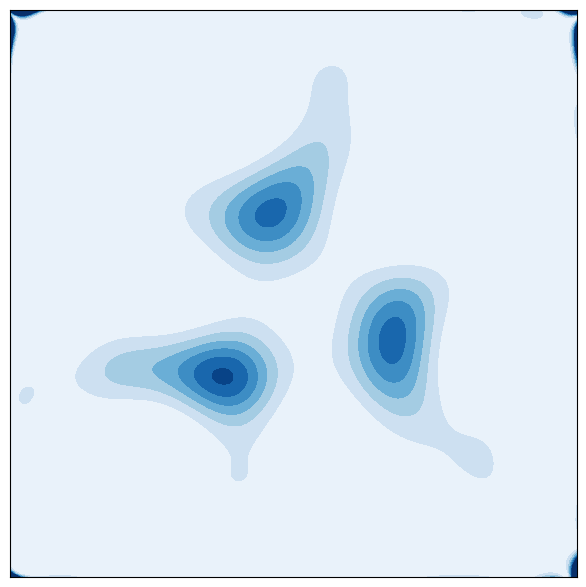

In [3]:
m_m = TotalDegreeSet(dim=2, order=15)
s_m = Legendre(multis=m_m, target=t_m)
r_m = TransportMap(s_m)

plotutil.plot_density(density=s_m, figsize=6, qcs=qcs)
#plt.savefig('/home/uq/notes/02 transport maps paper/fig/rosenbrock_density.pdf')
plt.show()

# Sample transport

In [4]:
p_uni_m, p_tar_m = r_m.samples(800)

In [5]:
lines_m, lines_t_m = r_m.grid(xs=[-1, -.98, -.8, -.6, .6, .8, .95, 1], ns=[10, 100, 50, 100, 50, 100, 100]) #xs=[-1, -.9, -.8, 0, .8, .9, .98, 1], ns=[50, 50, 50, 50, 50, 50, 50])

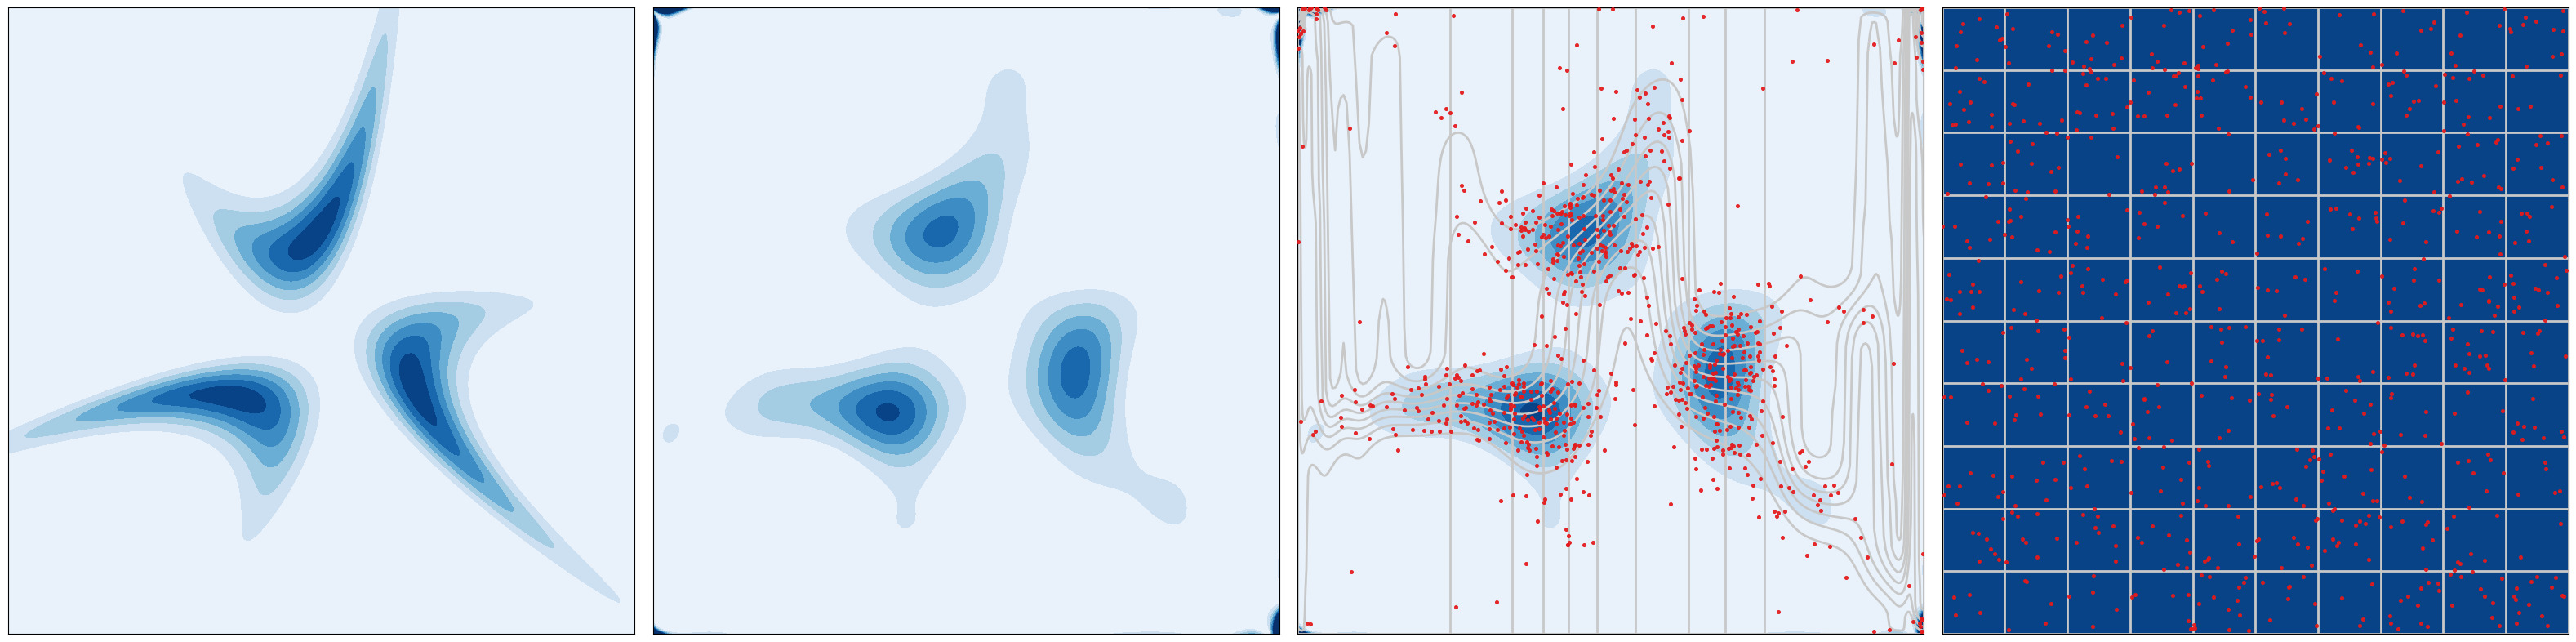

In [6]:
plotutil.plot_tbs_results(t_m, s_m, p_uni_m, p_tar_m, lines_m, lines_t_m)

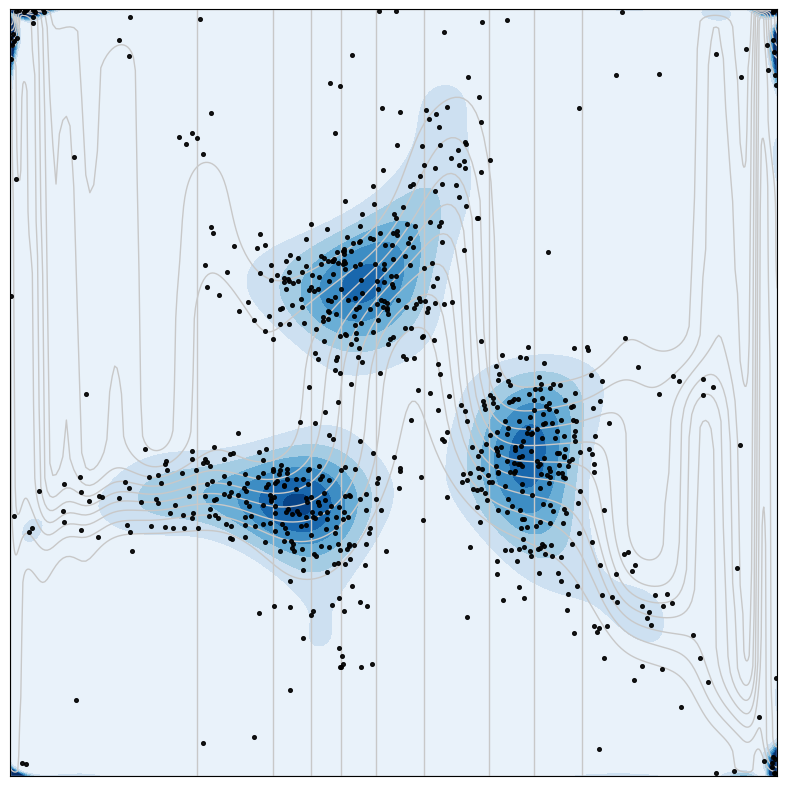

In [7]:
_, ax = plotutil.plot_density(density=s_m, fig=plt.figure(figsize=(8,8)), qcs=qcs)

for l in lines_t_m : ax.plot(l[0], l[1], '#c8c8c8', lw=1)
ax.scatter(p_tar_m[0], p_tar_m[1], s=7, color='k', alpha=.9, zorder=2)
plt.tight_layout()
#plt.savefig('/home/uq/notes/02 transport maps paper/fig/rosenbrock_samples_small.pdf')
plt.show()

# Convergence

In [8]:
#%%timeit -n 1 -r 1
ks = [3,5,8,11,15,17,20,24,28,32,36,40,45,50,55,60][::-1]
dh = np.zeros((len(ks),))
ap = np.zeros((len(ks),))
xs = np.zeros((len(ks),))
for i,k in enumerate(ks) :
    m_m = TotalDegreeSet(dim=2, order=k)
    s_m = Legendre(multis=m_m, target=t_m)
    e = s_m.computeError(n=1000, accurc=.001)
    dh[i] = e.hedist
    ap[i] = e.approx
    xs[i] = m_m.size()
    print('.', end=' ')

. . . . . . . . . . . . . . . . 

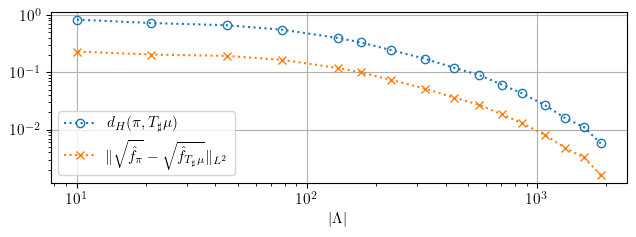

In [9]:
matplotlib.rcParams.update({"font.family": "serif", "text.usetex": True, "pgf.rcfonts": False})

tex = 0

if tex : matplotlib.use('pgf')
else :   matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 11})

ax = plotutil.get_ax(fig=plt.figure(figsize=(6.5, 2.5)), xlabel=r'$|\Lambda|$', logaxis=['x', 'y'])
ax.plot(xs, dh, marker='o', linestyle='dotted', markerfacecolor='none', markersize=6, label=r'$d_H(\pi, T_\sharp \mu)$')
ax.plot(xs, ap, marker='x', linestyle='dotted', markerfacecolor='none', markersize=6, label=r'$\|\sqrt{\hat f_\pi} - \sqrt{\hat f_{T_\sharp \mu}}\|_{L^2}$')
plt.legend(), plt.tight_layout()
if tex : plt.savefig('/home/uq/notes/02 transport maps paper/rosenbrock_error.pgf', format='pgf')
else :   plt.show()

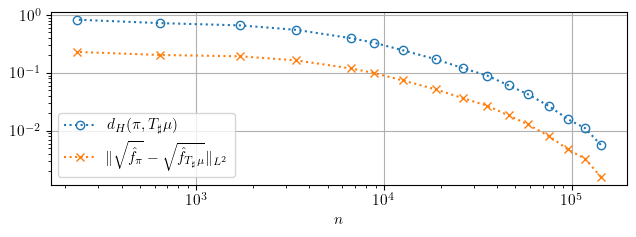

In [10]:
matplotlib.rcParams.update({"font.family": "serif", "text.usetex": True, "pgf.rcfonts": False})

tex = 0

if tex : matplotlib.use('pgf')
else :   matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 11})

ax = plotutil.get_ax(fig=plt.figure(figsize=(6.5, 2.5)), xlabel=r'$n$', logaxis=['x', 'y'])
ax.plot([10*n*np.log(n) for n in xs], dh, marker='o', linestyle='dotted', markerfacecolor='none', markersize=6, label=r'$d_H(\pi, T_\sharp \mu)$')
ax.plot([10*n*np.log(n) for n in xs], ap, marker='x', linestyle='dotted', markerfacecolor='none', markersize=6, label=r'$\|\sqrt{\hat f_\pi} - \sqrt{\hat f_{T_\sharp \mu}}\|_{L^2}$')
plt.legend(), plt.tight_layout()
if tex : plt.savefig('/home/uq/notes/02 transport maps paper/rosenbrock_error.pgf', format='pgf')
else :   plt.show()